<a href="https://www.kaggle.com/code/ashx010/house-price-data-analysis-and-prediction-model?scriptVersionId=136839842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [61]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [63]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [64]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [65]:
data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

# Analysis


#### Sale Price : Dependent Feature

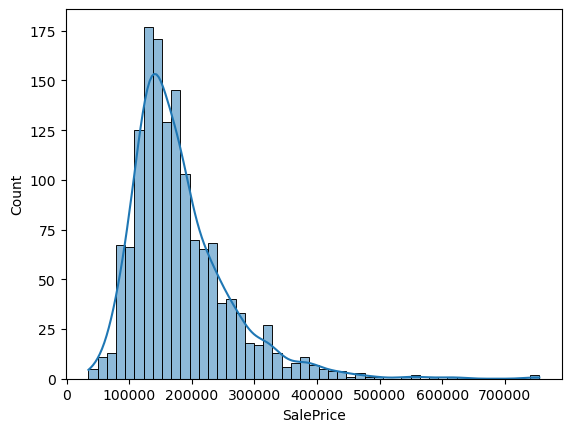

In [66]:
sns.histplot(x='SalePrice', data=data, kde=True)
plt.show()

## Data Preprocessing

In [67]:
feature = np.array(data.columns.to_list())

In [68]:
nan_val_col = feature[np.array(data.isnull().sum())>146]
nan_val_col

array(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], dtype='<U13')

In [69]:
data_temp = data.drop(nan_val_col, axis=1)
test_data.drop(nan_val_col, axis=1, inplace=True)

In [70]:
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

### Analyze Categorial Features

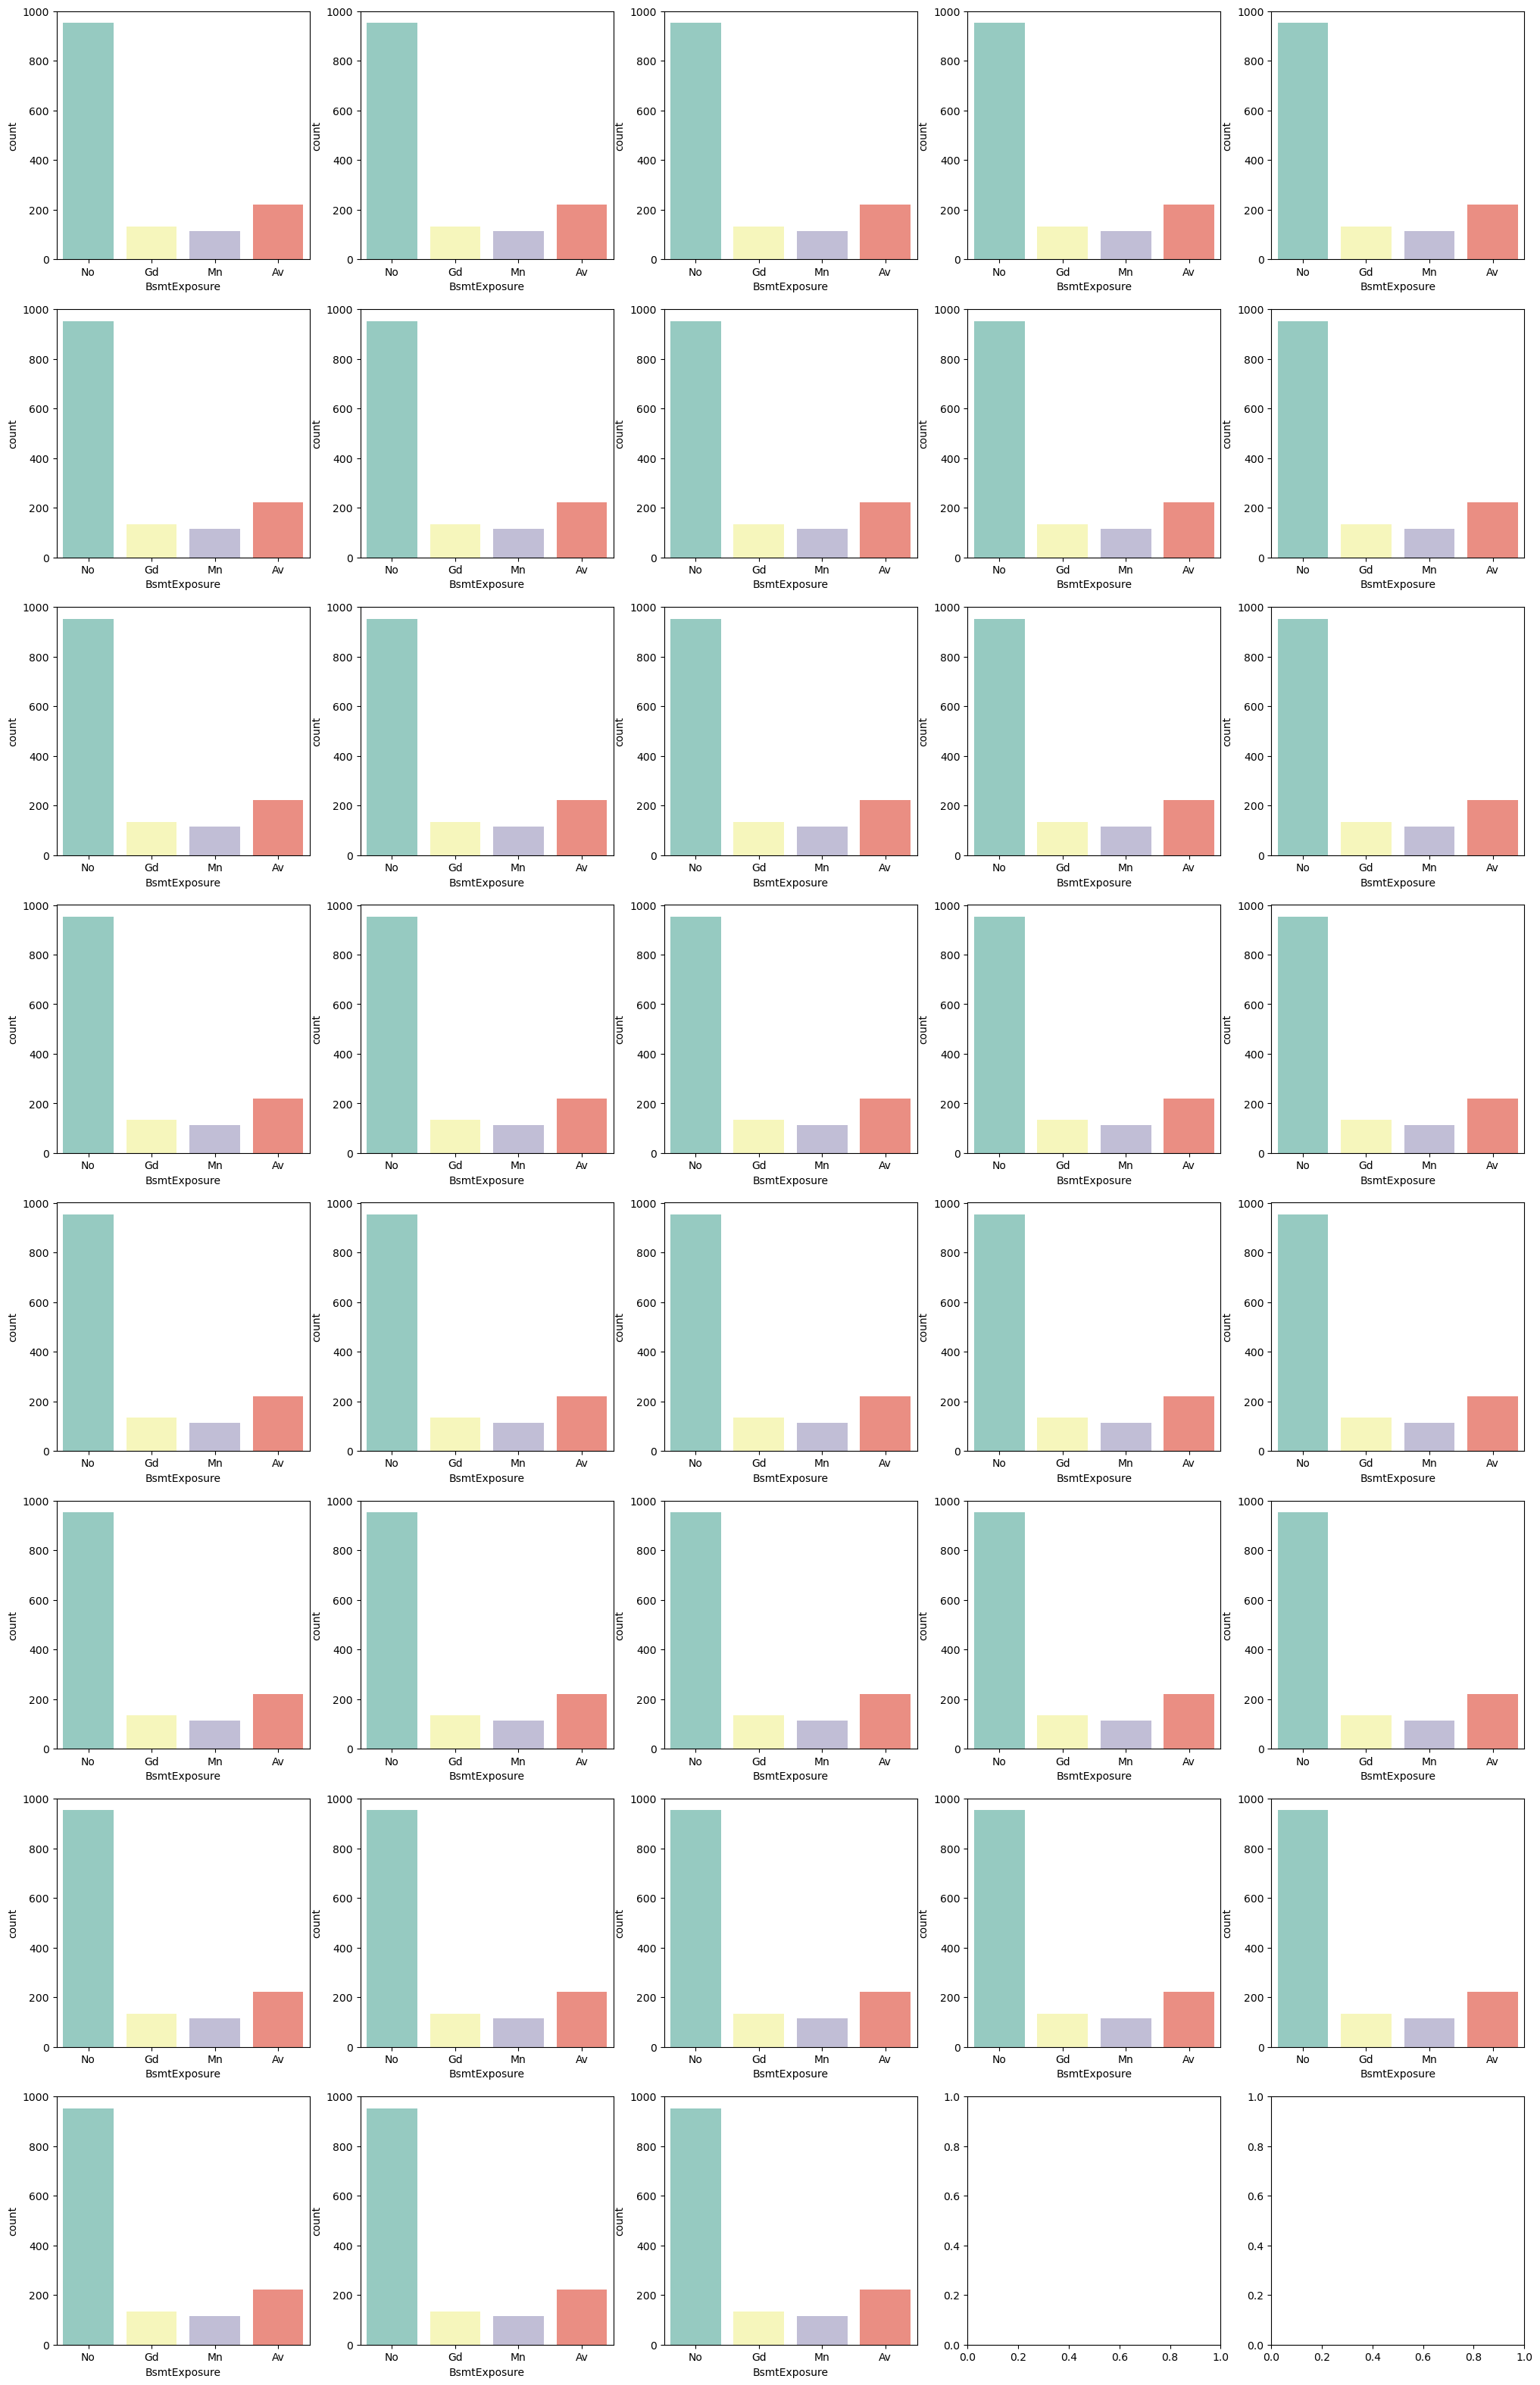

In [71]:
f,ax = plt.subplots(8,5, figsize=(25,40))
for i,ax in zip(cat_features, ax.reshape(-1)):
    sns.countplot(x=cat_features[k], data=data_temp, ax=ax, palette='Set3')
plt.show()

In [72]:
# Lets remove the features that only focused on one category.
data_temp.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street'], axis=1, inplace=True)

In [73]:
test_data.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street'], axis=1, inplace=True)

In [74]:
#Updating features
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

#### Categorial Features vs SalePrice

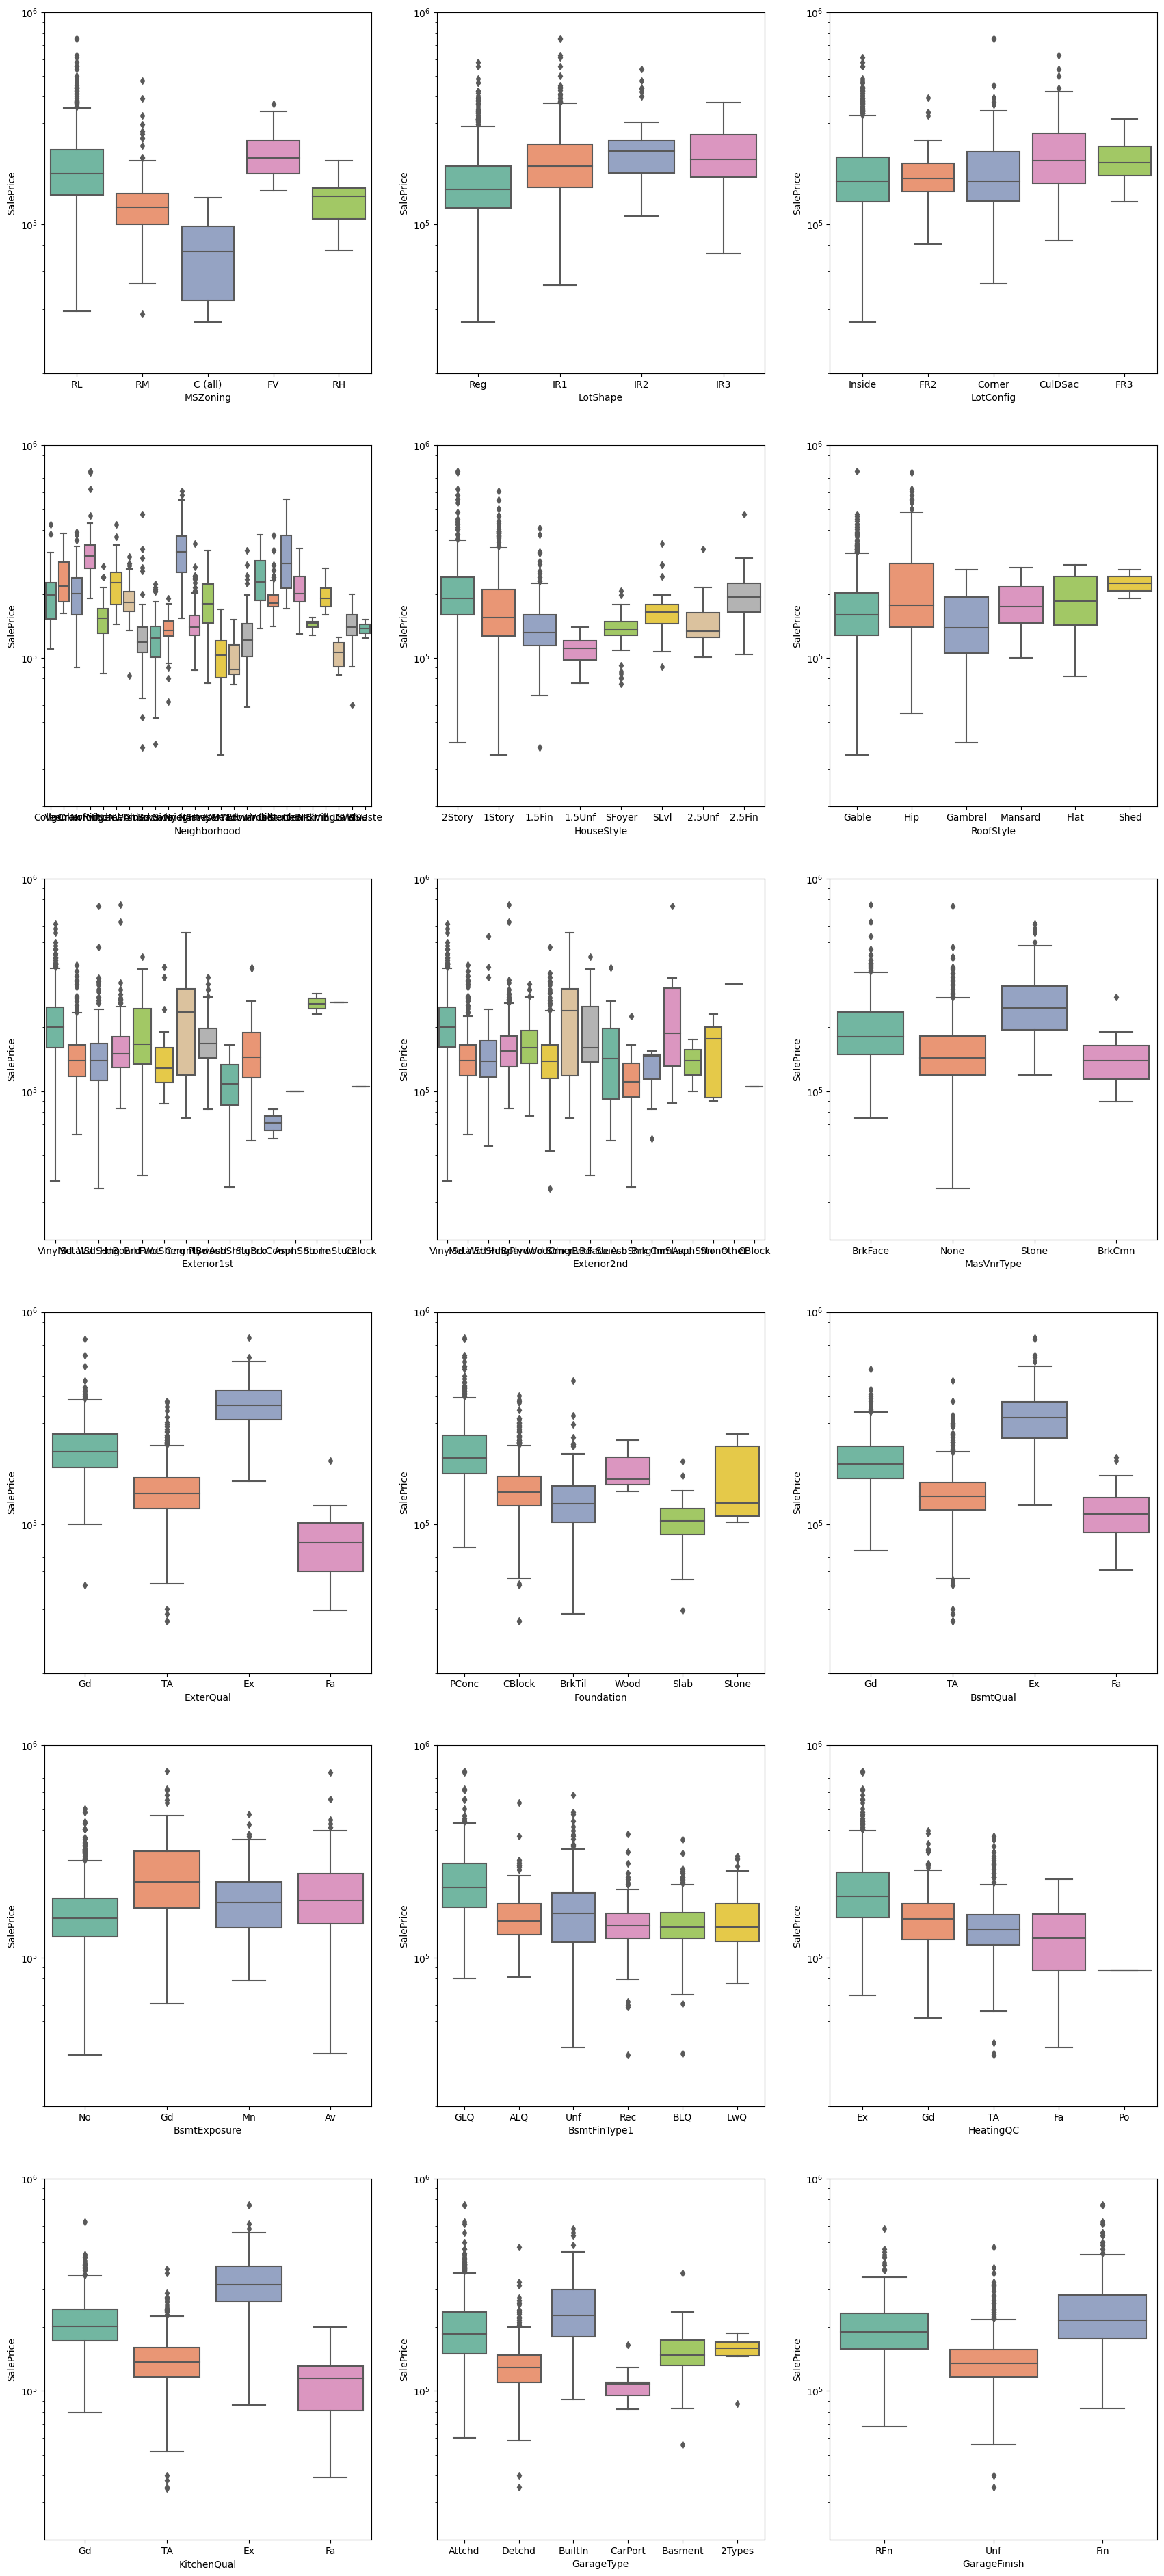

In [75]:
f,ax = plt.subplots(6,3, figsize=(21,48))
for i,ax in zip(cat_features, ax.reshape(-1)):
    sns.boxplot(x=i, y='SalePrice', data=data_temp, ax=ax, palette='Set2')
    ax.set_yscale('log')
    ax.set_ylim(20000, 1000000)
plt.show()

### Analyze Continuous Features

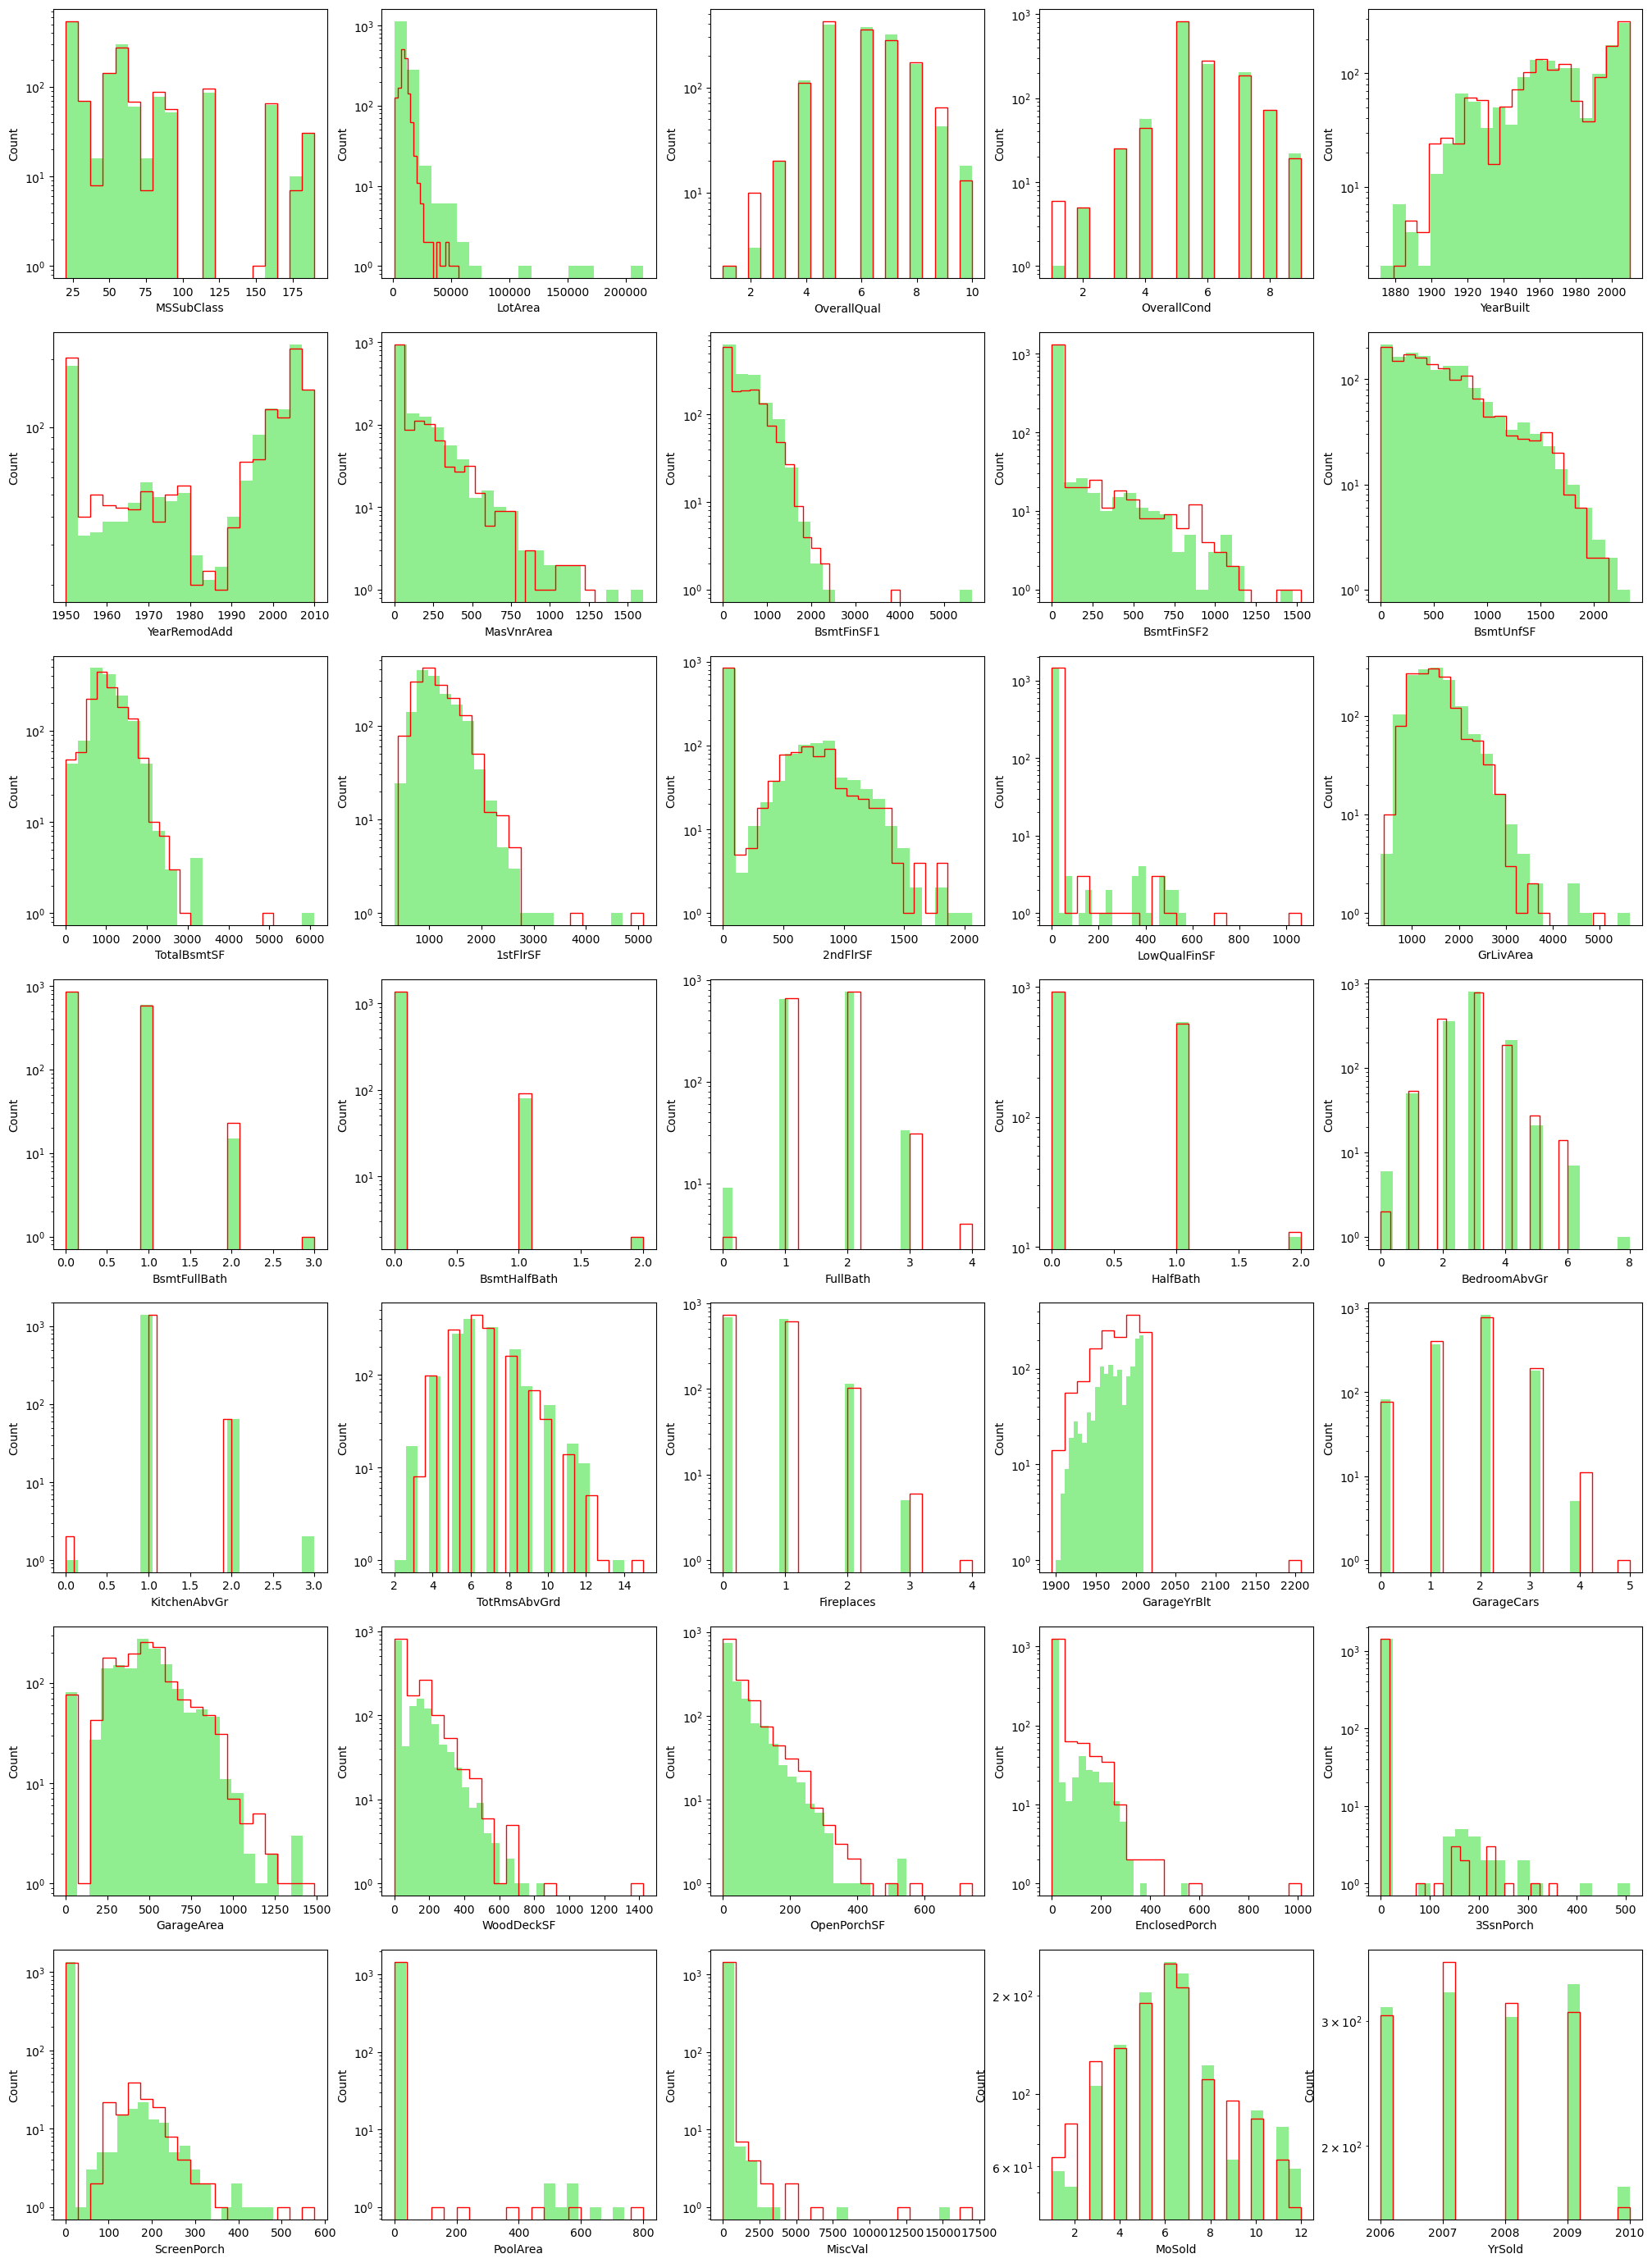

In [82]:
f,ax = plt.subplots(7,5, figsize=(25,35))
for i,ax in zip(cont_features[:-1], ax.reshape(-1)):
    ax.hist(data_temp[i], bins=20, histtype='bar', color='LightGreen')
    ax.hist(test_data[i], bins=20, histtype='step', color='Red')
    ax.set_xlabel(i)
    ax.set_ylabel('Count')
    ax.set_yscale('log')
plt.show()

**Key Points**
> * In above visualization, the **Green Bars** represents the **Training Data** and **Red Steps** represents the **Test data**.
> * The above plots show that there are ouliers in multiple features while some features aren't usefull.

In [83]:
# Removing Features that may not give any usefull info
data_temp.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
                'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath','LowQualFinSF',
                'BsmtFinSF2', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)

In [84]:
test_data.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
                'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath','LowQualFinSF',
                'BsmtFinSF2', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)

In [85]:
#updating features
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

### Handling Ouliers

In [86]:
# Handling outliers via IQR (interquartile range)
def outliers(data_temp, k=3):
    q1, q3 = np.percentile(data_temp, [25, 75])
    
    iqr = q3 - q1
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    outliers = [index for index,x in enumerate(data_temp) if x < lower_bound or x > upper_bound]
    
    return outliers

In [87]:
raws = []
for i in cont_features:
    raws += outliers(data_temp[i])

# No. of estimated Outliers
len(set(raws))

67

In [88]:
data_temp.drop(list(set(raws)), axis=0, inplace=True)

### Continuous Data vs SalePrice

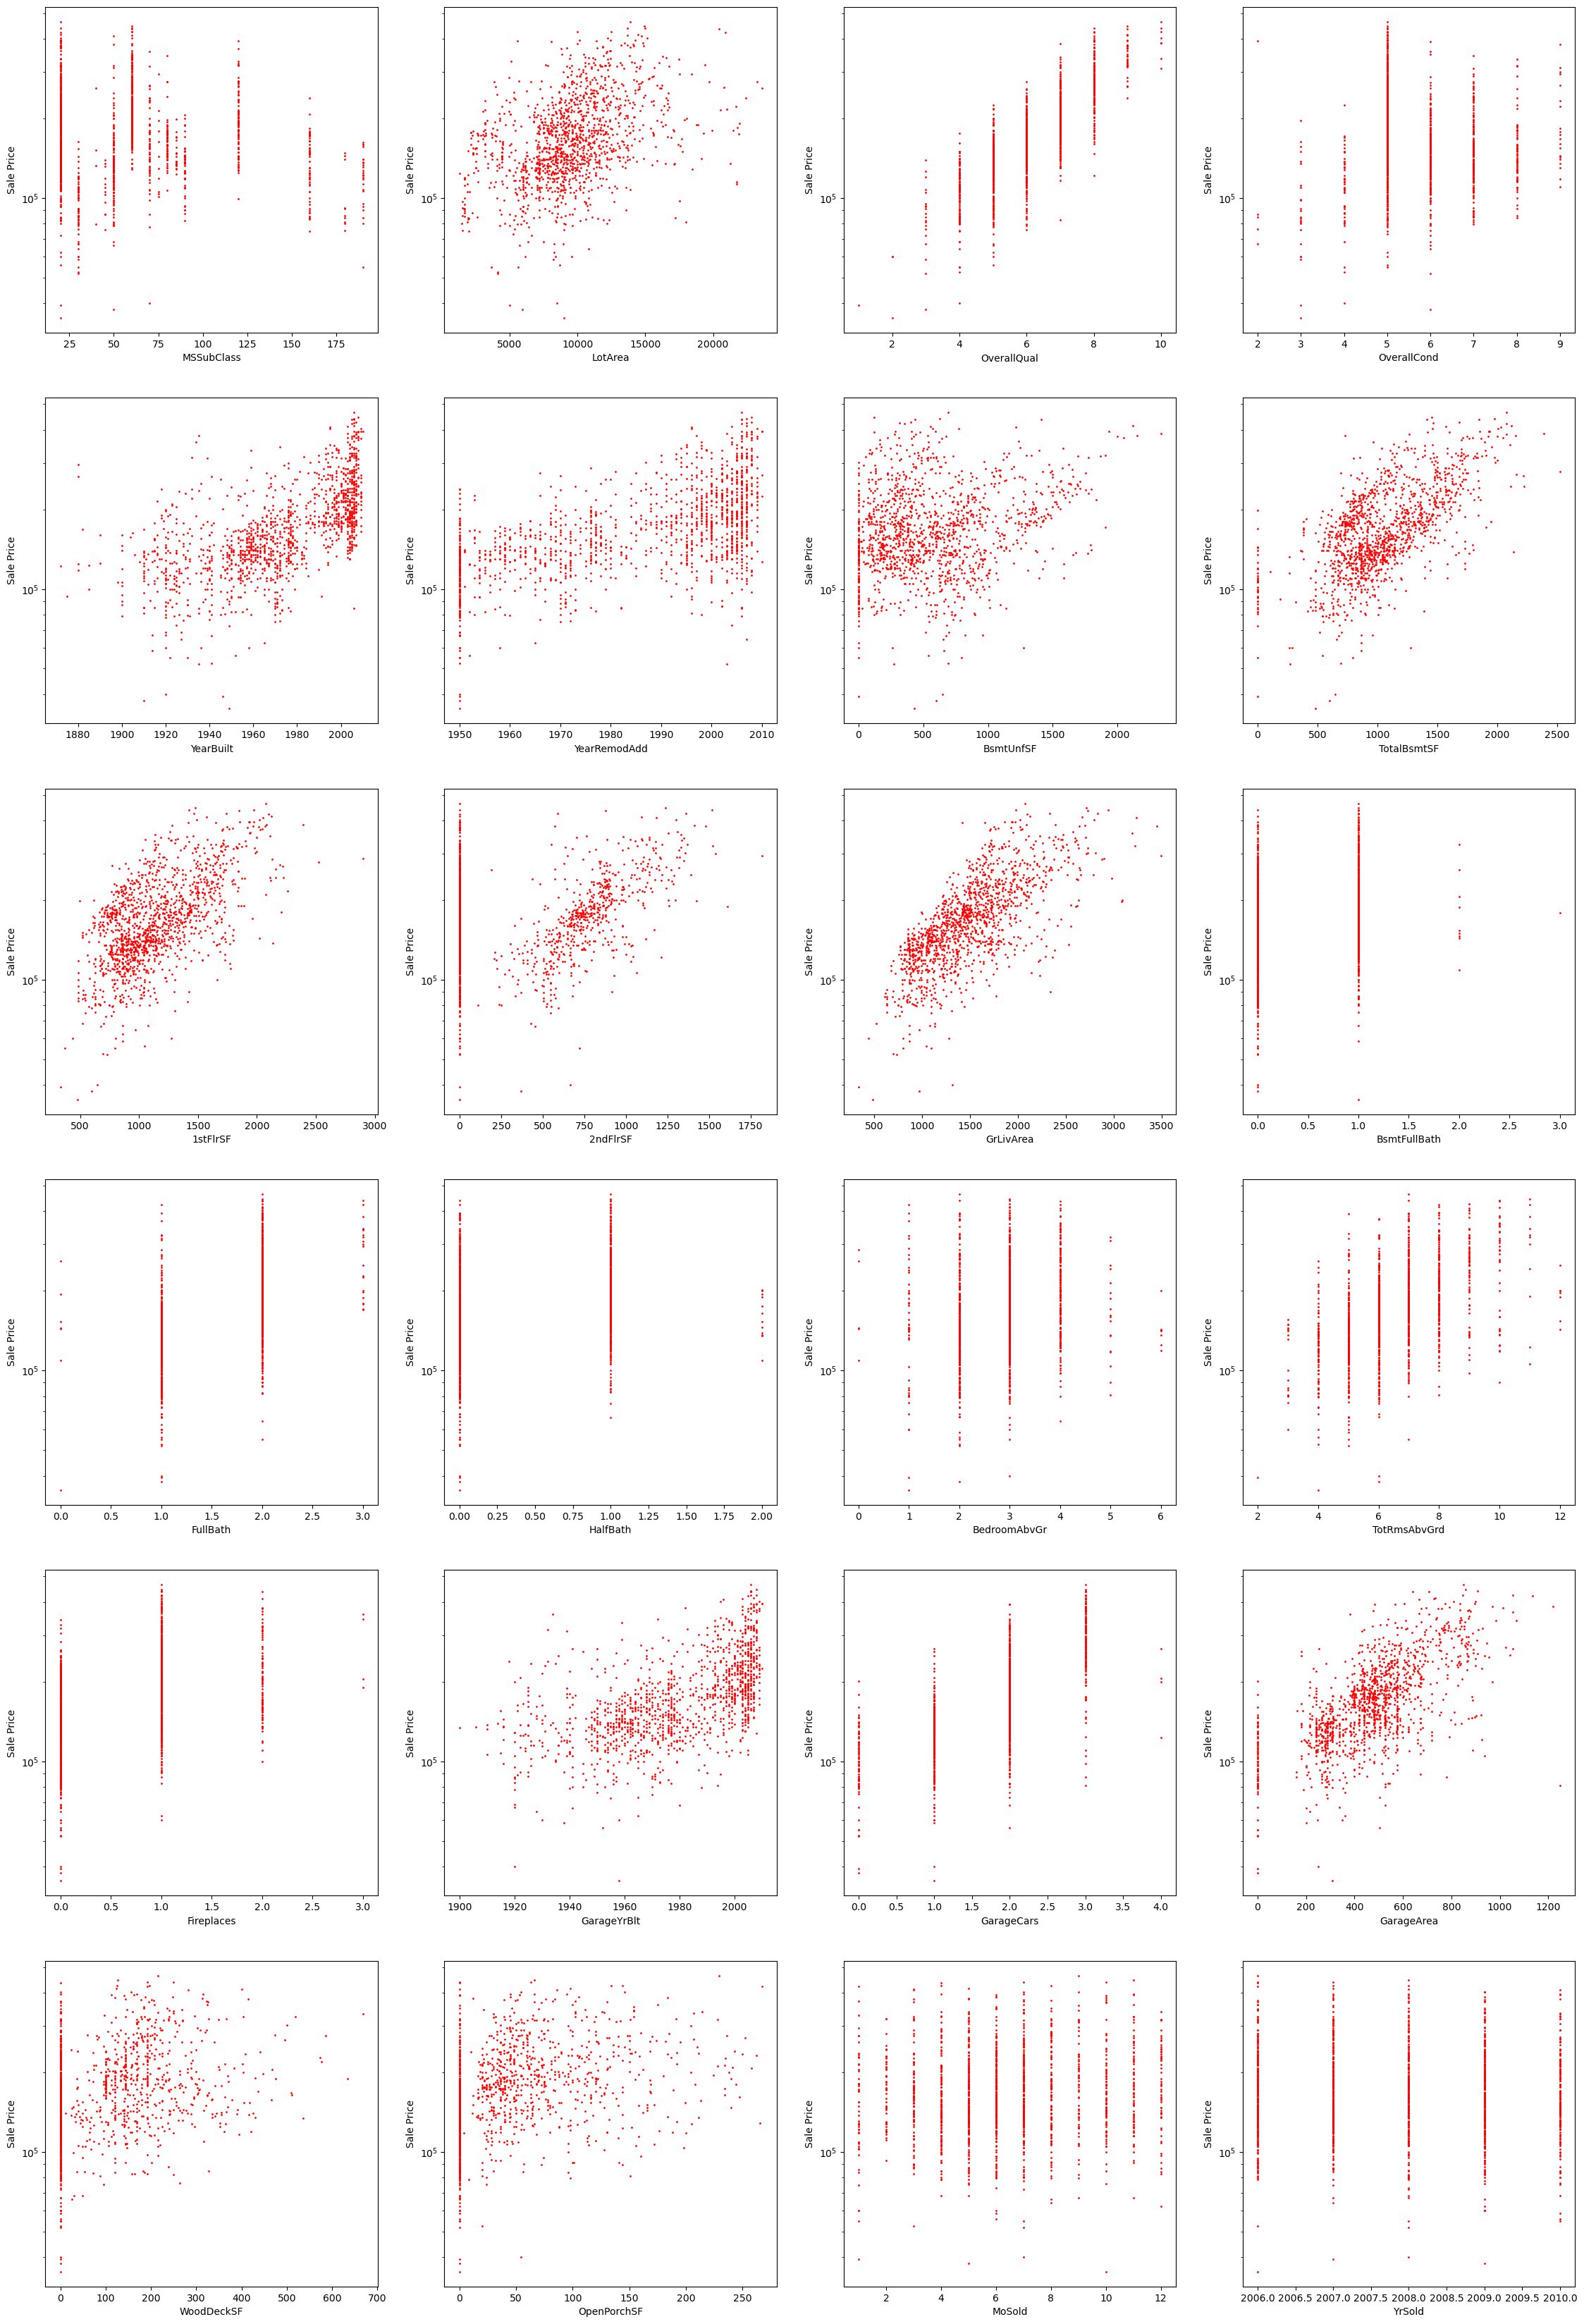

In [91]:
f,ax = plt.subplots(6,4, figsize=(28,42))
for i,ax in zip(cont_features, ax.reshape(-1)):
    ax.scatter(x=i, y='SalePrice', data=data_temp, s=1, c='red')
    ax.set_xlabel(i)
    ax.set_ylabel('Sale Price')
    ax.set_yscale('log')
plt.show()

### Seperating Dependent and Independent Feature

In [92]:
X = data_temp.iloc[:, :-1]
y = data_temp['SalePrice']

### Encoding Categorial Data

In [93]:
#updating features
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

In [94]:
# Encode Categorial Data
from sklearn.preprocessing import LabelEncoder
for i in cat_features:
    # Training Data
    enc = LabelEncoder()
    X[i] =enc.fit_transform(X[i])
    # Test Data
    enc2 = LabelEncoder()
    test_data[i] =enc2.fit_transform(test_data[i])

<AxesSubplot:>

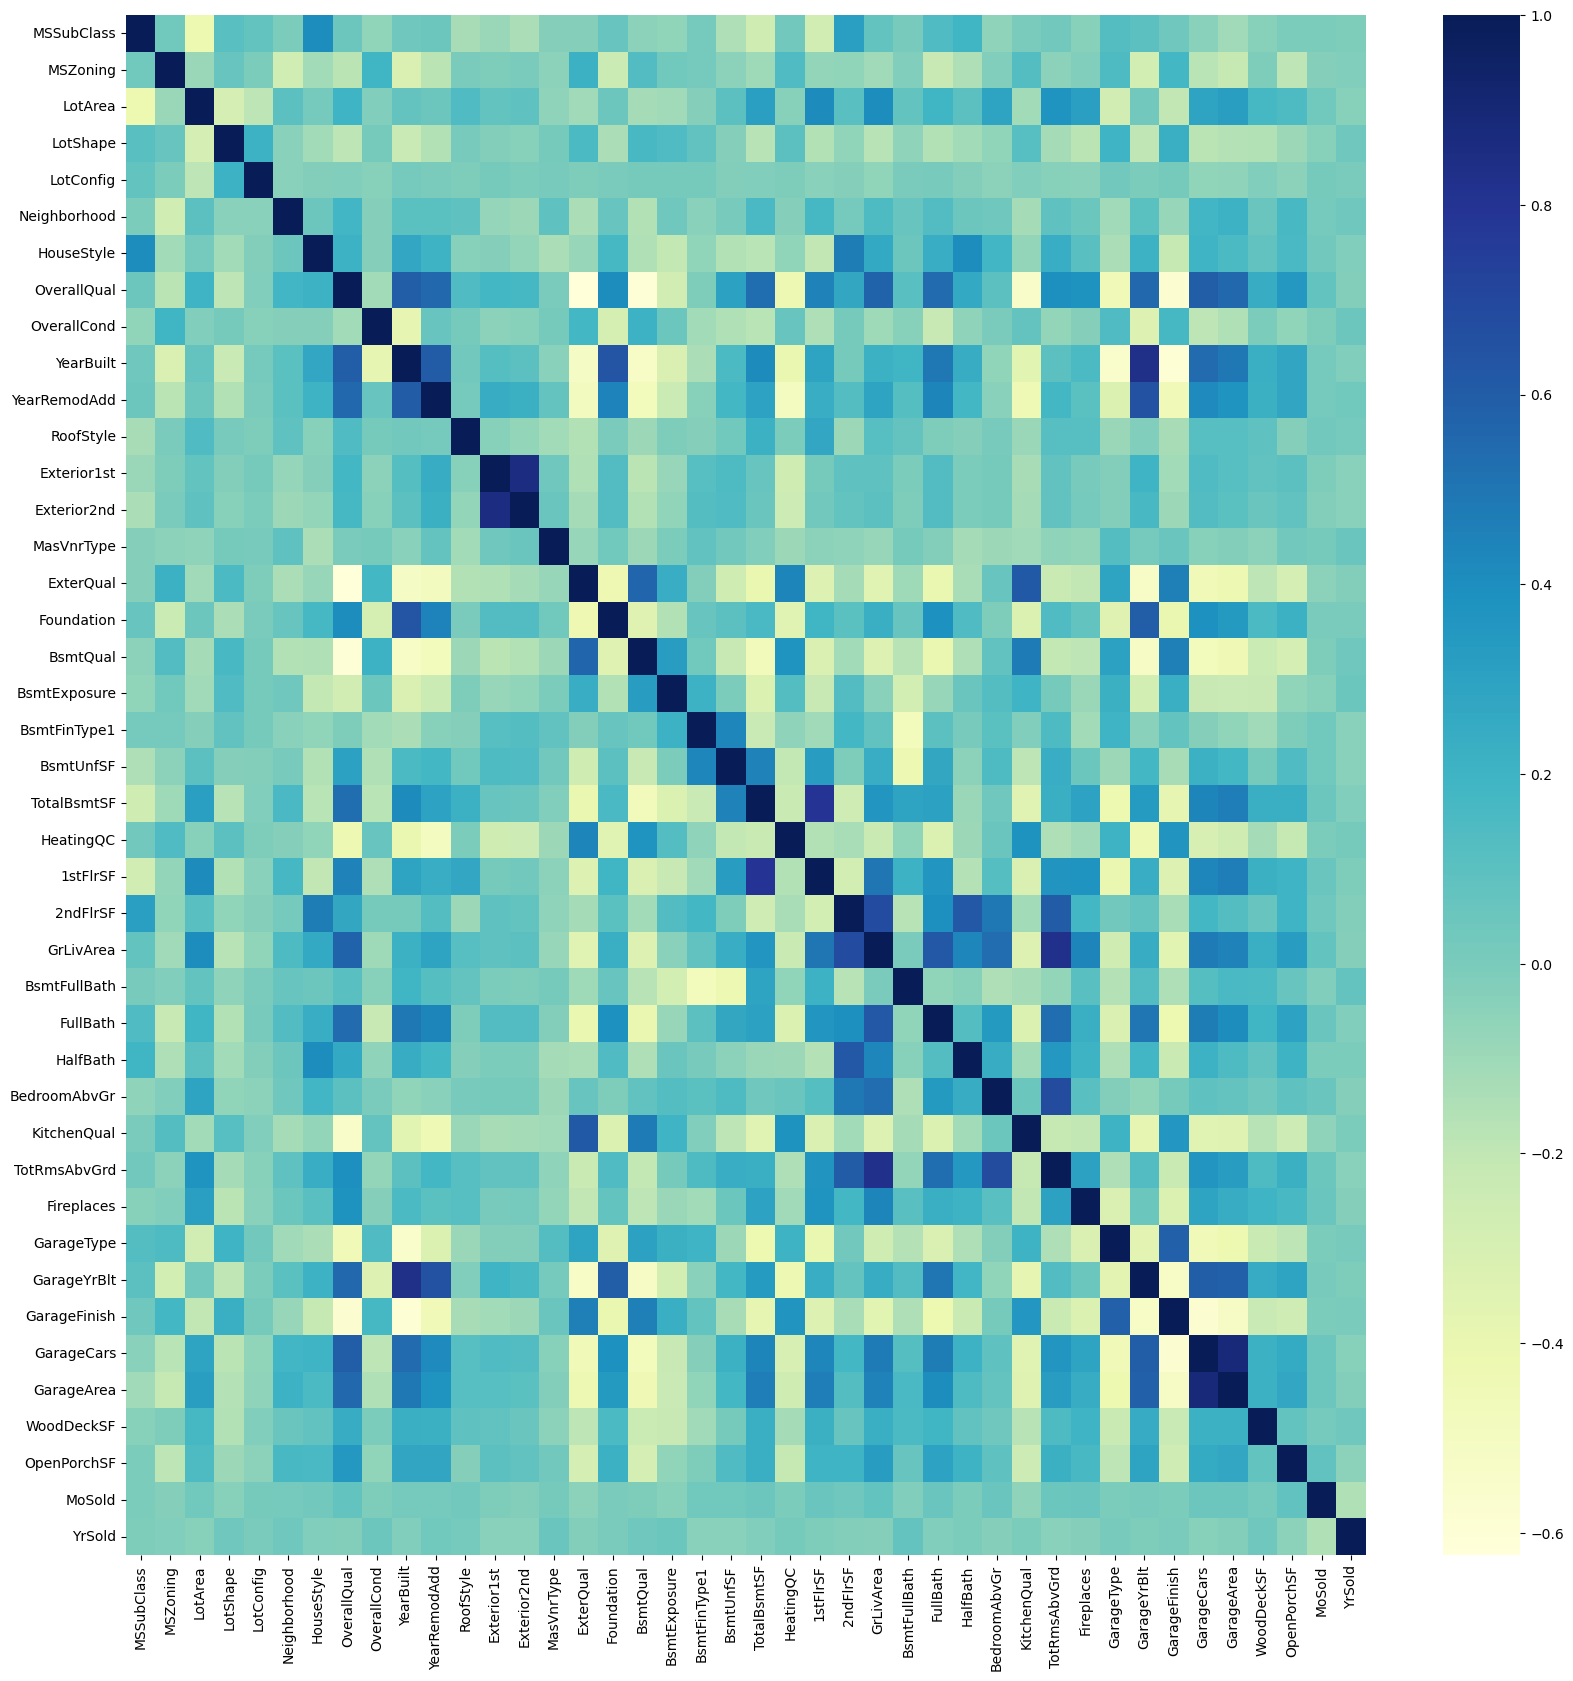

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), cmap='YlGnBu')

### Handle Nan Values

In [96]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
X = imputer.fit_transform(X)
test_data = imputer.transform(test_data)

#### Train-Test Split

In [97]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=1)

#### Feature Scaling

In [98]:
scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

test_data1 = scaler.transform(test_data)

# Machine Learning Model

#### Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression

pipeline1 = Pipeline([
    ('linearregression', LinearRegression())
])

param_grid = {'linearregression__fit_intercept': [True, False],
              'linearregression__copy_X': [True, False]
              }

grid_search1 = GridSearchCV(pipeline1, param_grid, cv=12)
grid_search1.fit(xtrain, ytrain)

print('Parameters : ', grid_search1.best_params_,'\nAccuracy Score : ', grid_search1.best_score_)


Parameters :  {'linearregression__copy_X': True, 'linearregression__fit_intercept': True} 
Accuracy Score :  0.8882807873453759


In [100]:
ypred1 = grid_search1.predict(xtest)

sc1 = r2_score(ytest, ypred1)
sc1

0.8752744385108919

#### Decision Tree

In [101]:
from sklearn.tree import DecisionTreeRegressor

pipeline2 = Pipeline([
    ('clf2', DecisionTreeRegressor(random_state=42))
])

param_grid2 = {
    'clf2__max_depth': [2, 3, 4, 5],
    'clf2__min_samples_split': [2, 5, 10],
    'clf2__min_samples_leaf': [1, 2, 4],
    'clf2__max_leaf_nodes': [None, 5, 10, 20]
}

grid_search2 = GridSearchCV(pipeline2, param_grid2, cv=15)
grid_search2.fit(xtrain, ytrain)

print('Parameters : ', grid_search2.best_params_,'\nAccuracy Score : ', grid_search2.best_score_)

Parameters :  {'clf2__max_depth': 5, 'clf2__max_leaf_nodes': 20, 'clf2__min_samples_leaf': 2, 'clf2__min_samples_split': 2} 
Accuracy Score :  0.7452611719949007


In [102]:
ypred2 = grid_search2.predict(xtest)

sc2 = r2_score(ytest, ypred2)
sc2

0.7610101869413777

#### Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor
pipeline3 = Pipeline([
    ('clf3', RandomForestRegressor())
])

param_grid3 = {
    'clf3__n_estimators': [100, 200, 500],
    'clf3__max_features': ['auto', 'sqrt'],
    'clf3__max_depth': [5, 15],
    'clf3__min_samples_split': [2, 5],
    'clf3__min_samples_leaf': [1, 3],
}

grid_search3 = GridSearchCV(pipeline3, param_grid3, cv=7)
grid_search3.fit(xtrain ,ytrain)

print('Parameters : ', grid_search3.best_params_,'\nAccuracy Score : ', grid_search3.best_score_)


Parameters :  {'clf3__max_depth': 15, 'clf3__max_features': 'sqrt', 'clf3__min_samples_leaf': 1, 'clf3__min_samples_split': 2, 'clf3__n_estimators': 500} 
Accuracy Score :  0.8971788783450231


In [104]:
ypred3 = grid_search3.predict(xtest)

sc3 = r2_score(ytest, ypred3)
sc3

0.85744151429621

#### XGBOOST

In [109]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline with XGBoost as the estimator
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_xgb', XGBRegressor())
])

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'clf_xgb__n_estimators': [100, 200, 500],
    'clf_xgb__learning_rate': [0.1, 0.01, 0.001],
    'clf_xgb__max_depth': [5, 10]
}

# Perform grid search using the pipeline and parameter grid
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=7)
grid_search_xgb.fit(xtrain, ytrain)

# Print the best parameters and best score
print('Parameters:', grid_search_xgb.best_params_)
print('Best Score:', grid_search_xgb.best_score_)


Parameters: {'clf_xgb__learning_rate': 0.1, 'clf_xgb__max_depth': 5, 'clf_xgb__n_estimators': 500}
Best Score: 0.9069728553317755


In [112]:
ypred4 = grid_search_xgb.predict(xtest)
sc4 = r2_score(ytest, ypred4)
sc4

0.8610169269147891

### Model Comparison

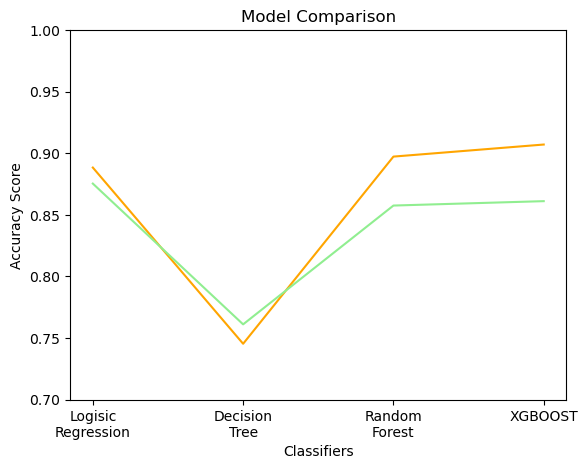

In [113]:
plt.plot(['Logisic\nRegression','Decision\nTree','Random\nForest', 'XGBOOST'],
         [grid_search1.best_score_,
          grid_search2.best_score_,
          grid_search3.best_score_,
          grid_search_xgb.best_score_],
        color = 'Orange')

plt.plot(['Logisic\nRegression','Decision\nTree','Random\nForest', 'XGBOOST'],
         [sc1,sc2,sc3,sc4],
        color = 'lightgreen')

plt.ylim(0.7,1)
plt.ylabel('Accuracy Score')
plt.xlabel('Classifiers')
plt.title('Model Comparison')
plt.show()

# Final Model

In [114]:
ypredf = grid_search_xgb.predict(test_data1)

In [117]:
# Submission
subm = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
subm.SalePrice = ypredf
subm.to_csv('submission1.csv', index=False)

### END..